In [3]:
from IPython.display import Image

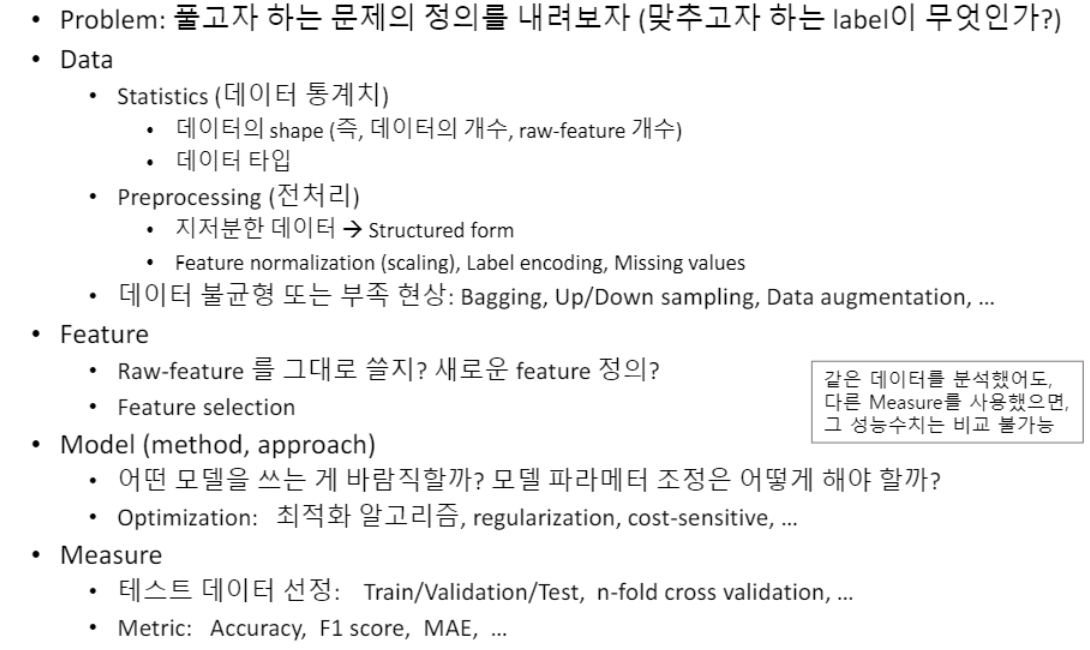

In [4]:
Image("C:/Users/joyh1/Desktop/DSC/modeling_process.png")

# 문제정의

- 해당 데이터는 Bible의 라틴 버전이라고 할 수 있는 'Avila Bible'이라는 Bible의 800개의 이미지로부터 추출된 데이터
- 이러한 데이터들을 이용해서 Avila Bible 이미지의 패턴을 분류하는 문제(Classification)
- Labels : A,B,C,D,E,F,G,H,I,W,X,Y (패턴의 종류들)

- Attribute(Feature) 의미 파악
- F1 : 열간 거리
- F2 : 상단 여백
- F3 : 하단 여백
- F4 : exploitation
- F5 : 줄 개수
- F6 : 모듈 비율
- F7 : 선형 간격
- F8 : 두께
- F9 : 피크(?) 수
- F10 : 모듈비율을 선형간격으로 나눈 값

# 데이터 

In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [12]:
# 데이터 로드(원본파일이 txt파일로 되어있었는데 구분자가 쉼표(,)여서 확장자명 csv파일로 바꾸어주고 로드)

#### py파일로 바꿔줄때 데이터 들어있는 fold_dir 수정해주기!!!!
fold_dir = 'C:/Users/joyh1/Desktop/GitRepo/data/'

train = pd.read_csv(fold_dir+"avila-tr.csv", header=None)
test = pd.read_csv(fold_dir+"avila-ts.csv", header=None)

print(f'Train 데이터 Shape : {train.shape}')
print(f'Test 데이터 Shape : {test.shape}')

Train 데이터 Shape : (10430, 11)
Test 데이터 Shape : (10437, 11)


In [17]:
# Train, Test 데이터 결합시키기
data = pd.concat([train, test], axis=0)

# Attribute이름 조건, 반복문으로 변경
for i in range(0, len(data.columns)):
    if i == 10:
        data = data.rename(columns={i:'label'})
    else:
        data = data.rename(columns={i:f'F{i+1}'})
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,label
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,A
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,A
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,A
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,A
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,F


In [18]:
# 결측치 확인
data.isnull().sum()

F1       0
F2       0
F3       0
F4       0
F5       0
F6       0
F7       0
F8       0
F9       0
F10      0
label    0
dtype: int64

In [19]:
# 데이터 행,열 갯수 확인
data.shape

(20867, 11)

In [20]:
# 데이터 타입확인
data.dtypes

F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6       float64
F7       float64
F8       float64
F9       float64
F10      float64
label     object
dtype: object

In [21]:
# object타입인 label의 기술통계량 확인
data.describe(include=object)

,label
count,20867
unique,12
top,A
freq,8572


In [22]:
# label개수를 살펴보고 Class imbalance가 있는지 살펴보기
data['label'].value_counts()

A    8572
F    3923
E    2190
I    1663
X    1044
H    1039
G     893
D     705
Y     533
C     206
W      89
B      10
Name: label, dtype: int64

In [ ]:
# Oversampling할 Label은? B,W,C ?  아니면 undersampling? 
# 1. Oversampling


In [24]:
# Feature Normalization이 필요한지 아닌지 보기 위해 수치로 이루어진 Feature기술통계량 보기
data.describe()
# F2, F3, F7의 값들의 최대값이 매우 큰걸 보아하니 feature normalization이 필요할 듯 보인다.

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
count,2.086700e+04,20867.000000,20867.000000,20867.000000,2.086700e+04,20867.000000,20867.000000,20867.000000,20867.000000,20867.000000
mean,-3.306656e-09,0.018498,0.002329,0.000115,5.697992e-08,0.002540,0.003977,0.000028,0.002108,0.000069
std,1.000007e+00,2.853117,1.058203,0.999997,9.999948e-01,1.065179,1.153325,1.000003,1.045362,1.000010
min,-3.498799e+00,-2.426761,-3.210528,-5.440122,-4.922215e+00,-7.450257,-11.935457,-4.247781,-5.486218,-6.719324
25%,-1.289290e-01,-0.259834,0.064919,-0.527256,1.723400e-01,-0.598658,-0.044076,-0.543914,-0.372457,-0.515235
50%,5.622900e-02,-0.055704,0.217845,0.089437,2.617180e-01,-0.058835,0.220177,0.108279,0.064084,-0.025918
75%,2.043550e-01,0.203385,0.352988,0.643738,2.617180e-01,0.564038,0.446679,0.648813,0.500624,0.528425
max,1.181992e+01,386.000000,50.000000,3.987152,1.066121e+00,53.000000,83.000000,13.173081,44.000000,11.911338


In [27]:
# LabelEncoding하기
label_encoder = preprocessing.LabelEncoder()
# Encoding할 값 할당해서 fit, transform해줘서 기존 label값에서 바꿔주기
# 바꿔서 반환되는 값의 type은 int형이다.
data['label'] = label_encoder.fit_transform(data['label'])
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,label
0,0.266074,-0.165620,0.320980,0.483299,0.172340,0.273364,0.371178,0.929823,0.251173,0.159345,0
1,0.130292,0.870736,-3.210528,0.062493,0.261718,1.436060,1.465940,0.636203,0.282354,0.515587,0
2,-0.116585,0.069915,0.068476,-0.783147,0.261718,0.439463,-0.081827,-0.888236,-0.123005,0.582939,0
3,0.031541,0.297600,-3.210528,-0.583590,-0.721442,-0.307984,0.710932,1.051693,0.594169,-0.533994,0
4,0.229043,0.807926,-0.052442,0.082634,0.261718,0.148790,0.635431,0.051062,0.032902,-0.086652,5


# Feature

In [29]:
# Feature Selection하지 않고 Raw Feature들을 그냥 쓸 것인가? yes....
#굳이 조치해주어야 한다고 하면 Feature normalization밖에 없는 것 같은데...


# Model
- 선택할 모델 리스트 : Linear regression, Logistic regression, Support Vector Machine(SVM or SVC), Support Vector Regression, Random Forest, Gaussian naive bayes, Multilayer perceptron, Decision Tree 

In [ ]:
# 어떤 모델은 선정!? => 분류.. Logistic Regression, SVM, RF, MLP  써서 성능 좋은 걸로 선택!